# Automatic data downloading

In this example we will show how one can download data from a Jupyter notebook.

The [PhysOcean](https://github.com/gher-uliege/PhysOcean.jl) module provides ways to automatically download data from 
- the [World Ocean Database](https://www.nodc.noaa.gov/OC5/WOD/pr_wod.html) and
- the [CMEMS](http://marine.copernicus.eu/) In-Situ TAC.

This module can be installed by: 

```julia
using Pkg
Pkg.add("PhysOcean")
```
or in the package REPL
```julia
(@v1.11) pkg> add PhysOcean
```

In [20]:
using CairoMakie
using GeoMakie
using PhysOcean           # Download data from the World Ocean Database and Copernicus
using DIVAnd              # DIVAnd 
using Dates
using Statistics
include("../config.jl")

"https://dox.uliege.be/index.php/s/8tRk0NAStr2P70j/download"

## Settings
Define the time and geospatial bounding box for downloading the data

In [4]:
# resolution (the resolution is only used for DIVAnd analyses)
dx = dy = 0.25   # medium size test 

# vectors defining the longitude and latitudes grids
# Here longitude and latitude correspond to the Mediterranean Sea
lonr = -7:dx:37
latr = 30:dy:46

# time range of the in-situ data
timerange = [Date(2016,1,1),Date(2016,12,31)]

2-element Vector{Date}:
 2016-01-01
 2016-12-31

In [44]:
# Name of the variable
varname = "Salinity"

"Salinity"

Please use your own email address (!) 😉     
It is only use to get notified by mail once the dataset is ready.

In [6]:
if isfile("email.txt")
    email = strip(read("email.txt",String));
    @info("Getting email address from email.txt");
else
    @warn("Create a file 'email.txt' if you want to query data to the World Ocean Database")
end

# Email for downloading the data
# Indicate here your email address
# email = "___@____.__"

┌ Warning: Create a file 'email.txt' if you want to query data to the World Ocean Database
└ @ Main In[6]:5


## Download the data

* World Ocean Database: example for bulk access data by simulating a web-user.
* Downloading can take several tens of minutes.
* SeaDataNet will provide a dedicated machine-to-machine interface during the SeaDataCloud project

In [5]:
?WorldOceanDatabase.download

!!! warning
    The following bindings may be internal; they may change or be removed in future versions:

      * `PhysOcean.WorldOceanDatabase.download`


```
dirnames,indexnames = WorldOceanDatabase.download(lonrange,latrange,timerange,
  variable,email,basedir)
```

Download data using the NODC web-service. The range parameters are vectors from with the frist element is the lower bound and the last element is the upper bound. The parameters of the functions will be transmitted to nodc.noaa.gov (http://www.noaa.gov/privacy.html). Note that no XBT corrections are applied. The table below show the avialable variable and their units.

Example:

dirnames,indexnames = WorldOceanDatabase.download([0,10],[30,40],     [DateTime(2000,1,1),DateTime(2000,2,1)],     "Temperature","your@email.com,"/tmp")

| Variables                          | Unit     |
|:---------------------------------- |:-------- |
| Temperature                        | °C       |
| Salinity                           | unitless |
| Oxygen                             | ml l⁻¹   |
| Phosphate                          | µM       |
| Silicate                           | µM       |
| Nitrate and Nitrate+Nitrite        | µM       |
| pH                                 | unitless |
| Chlorophyll                        | µg l⁻¹   |
| Plankton                           | multiple |
| Alkalinity                         | meq l⁻¹  |
| Partial Pressure of Carbon Dioxide | µatm     |
| Dissolved Inorganic Carbon         | mM       |
| Transmissivity                     | m⁻¹      |
| Pressure                           | dbar     |
| Air temperature                    | °C       |
| CO2 warming                        | °C       |
| CO2 atmosphere                     | ppm      |
| Air pressure                       | mbar     |
| Tritium                            | TU       |
| Helium                             | nM       |
| Delta Helium-3                     | %        |
| Delta Carbon-14                    | ᵒ/ᵒᵒ     |
| Delta Carbon-13                    | ᵒ/ᵒᵒ     |
| Argon                              | nM       |
| Neon                               | nM       |
| Chlorofluorocarbon 11 (CFC 11)     | pM       |
| Chlorofluorocarbon 12 (CFC 12)     | pM       |
| Chlorofluorocarbon 113 (CFC 113)   | pM       |
| Delta Oxygen-18                    | ᵒ/ᵒᵒ     |


Define the directory where the results will be saved. This directory must exists and must be empty.   
The command `mkpath` will create this path (including parent path).

In [39]:
basedir = joinpath(datadir, "WOD-temporary-dir")
isdir(basedir) ? rm(basedir,recursive=true) : mkpath(basedir)
# WorldOceanDatabase.download(lonr, latr, timerange, varname, email, basedir);

"../data/WOD-temporary-dir"

Downloading from World Ocean Database can take some time, the result from the previous request can be download directly:

In [40]:
download_check(WODdatafile, WODdatafileURL)
extractcommand = `tar -C $(datadir) -xvzf $(WODdatafile)`
run(extractcommand);

WOD-temporary-dir/
WOD-temporary-dir/PFL/
WOD-temporary-dir/PFL/wod_017424830O.nc
WOD-temporary-dir/PFL/wod_017867477O.nc
WOD-temporary-dir/PFL/wod_017868469O.nc
WOD-temporary-dir/PFL/wod_017708710O.nc
WOD-temporary-dir/PFL/wod_017705460O.nc
WOD-temporary-dir/PFL/wod_017416833O.nc
WOD-temporary-dir/PFL/wod_017709684O.nc
WOD-temporary-dir/PFL/wod_017893158O.nc
WOD-temporary-dir/PFL/wod_017866617O.nc
WOD-temporary-dir/PFL/wod_017782318O.nc
WOD-temporary-dir/PFL/wod_017403893O.nc
WOD-temporary-dir/PFL/wod_017430010O.nc
WOD-temporary-dir/PFL/wod_017754845O.nc
WOD-temporary-dir/PFL/wod_017752516O.nc
WOD-temporary-dir/PFL/wod_017769855O.nc
WOD-temporary-dir/PFL/wod_017775580O.nc
WOD-temporary-dir/PFL/wod_017758088O.nc
WOD-temporary-dir/PFL/wod_017870101O.nc
WOD-temporary-dir/PFL/wod_017881952O.nc
WOD-temporary-dir/PFL/wod_017775956O.nc
WOD-temporary-dir/PFL/wod_018667651O.nc
WOD-temporary-dir/PFL/wod_017870424O.nc
WOD-temporary-dir/PFL/wod_017888245O.nc
WOD-temporary-dir/PFL/wod_017699430O.n

[ Info: File already downloaded


WOD-temporary-dir/PFL/wod_017873192O.nc
WOD-temporary-dir/PFL/wod_017414923O.nc
WOD-temporary-dir/PFL/wod_017705056O.nc
WOD-temporary-dir/PFL/wod_017705673O.nc
WOD-temporary-dir/PFL/wod_017870975O.nc
WOD-temporary-dir/PFL/wod_017896340O.nc
WOD-temporary-dir/PFL/wod_017684250O.nc
WOD-temporary-dir/PFL/wod_017709837O.nc
WOD-temporary-dir/PFL/wod_017409231O.nc
WOD-temporary-dir/PFL/wod_017907987O.nc
WOD-temporary-dir/PFL/wod_017426542O.nc
WOD-temporary-dir/PFL/wod_017751988O.nc
WOD-temporary-dir/PFL/wod_017764242O.nc
WOD-temporary-dir/PFL/wod_017757493O.nc
WOD-temporary-dir/PFL/wod_017888466O.nc
WOD-temporary-dir/PFL/wod_017773633O.nc
WOD-temporary-dir/PFL/wod_017690901O.nc
WOD-temporary-dir/PFL/wod_017440832O.nc
WOD-temporary-dir/PFL/wod_017868707O.nc
WOD-temporary-dir/PFL/wod_017425647O.nc
WOD-temporary-dir/PFL/wod_017877702O.nc
WOD-temporary-dir/PFL/wod_017417158O.nc
WOD-temporary-dir/PFL/wod_017698806O.nc
WOD-temporary-dir/PFL/wod_017870972O.nc
WOD-temporary-dir/PFL/wod_017893638O.nc


Excessive output truncated after 524315 bytes.

WOD-temporary-dir/GLD/wod_018572032O.nc
WOD-temporary-dir/GLD/wod_018568518O.nc
WOD-temporary-dir/GLD/wod_018570617O.nc
WOD-temporary-dir/GLD/wod_018580680O.nc
WOD-temporary-dir/GLD/wod_018577249O.nc
WOD-temporary-dir/GLD/wod_018580931O.nc
WOD-temporary-dir/GLD/wod_018579931O.nc
WOD-temporary-dir/GLD/wod_018569140O.nc
WOD-temporary-dir/GLD/wod_018568074O.nc
WOD-temporary-dir/GLD/wod_018569122O.nc
WOD-temporary-dir/GLD/wod_018578764O.nc
WOD-temporary-dir/GLD/wod_018580068O.nc
WOD-temporary-dir/GLD/wod_018574959O.nc
WOD-temporary-dir/GLD/wod_018580745O.nc
WOD-temporary-dir/GLD/wod_018578850O.nc
WOD-temporary-dir/GLD/wod_018575612O.nc
WOD-temporary-dir/GLD/wod_018573542O.nc
WOD-temporary-dir/GLD/wod_018569722O.nc
WOD-temporary-dir/GLD/wod_018572212O.nc
WOD-temporary-dir/GLD/wod_018580543O.nc
WOD-temporary-dir/GLD/wod_018577238O.nc
WOD-temporary-dir/GLD/wod_018581333O.nc
WOD-temporary-dir/GLD/wod_018571644O.nc
WOD-temporary-dir/GLD/wod_018581628O.nc
WOD-temporary-dir/GLD/wod_018572383O.nc


# Load data
Load the data into memory and perform, if needed, an additional subsetting

In [54]:
# load all data under basedir as a double-precision floating point variable
obsval, obslon, obslat, obsdepth, obstime, obsid = 
WorldOceanDatabase.load(Float64, basedir, "Salinity");
@info("Number of data points: $(length(obsval))")

[ Info: Loading files from ../data/WOD-temporary-dir/CTD/ocldb1560238968.6282.CTD.nc


Check some observation IDs

In [43]:
@show obsid[1];
@show obsid[2];

LoadError: BoundsError: attempt to access 0-element Vector{String} at index [1]

With `checkobs` we get an overview of the extremal values of each dimension and variable.

In [ ]:
checkobs((obslon, obslat, obsdepth, obstime), obsval, obsid)

## Additional sub-setting 
Based on time and depth for plotting.     
For instance the month can be extracted from the `Date` using:

In [ ]:
Dates.month.(obstime)

In [ ]:
# depth range levels
depthr = [0., 20.]

# month range (January to March)
timer = [1, 3]

# additional sub-setting and discard wrong negative salinities
sel = ((obsval .> 0 )
       .& (minimum(depthr) .<= obsdepth .<= maximum(depthr))
       .& (minimum(timer) .<= Dates.month.(obstime) .<= maximum(timer)));

@show typeof(sel);
@show size(sel);

The new variables (ending by `sel`) are a sub-selection based on the previous criteria.

In [ ]:
valsel = obsval[sel]
lonsel = obslon[sel]
latsel = obslat[sel]
depthsel = obsdepth[sel]
timesel = obstime[sel]
idssel = obsid[sel];

Let's perform again the check.

In [ ]:
checkobs((lonsel,latsel,depthsel,timesel),valsel,idssel)

Number of selected data points

In [ ]:
length(valsel)

## Bathymetry download 
For plotting purpose. See [06-topography](06-topography.ipynb) for details.

In [11]:
bathname = gebco16file
download_check(gebco16file, gebco16fileURL)
bathisglobal = true

# Extract the bathymetry for plotting
bx, by, b = DIVAnd.extract_bath(bathname, bathisglobal, lonr, latr);

[ Info: File already downloaded


Create a simple plot to show the domain.

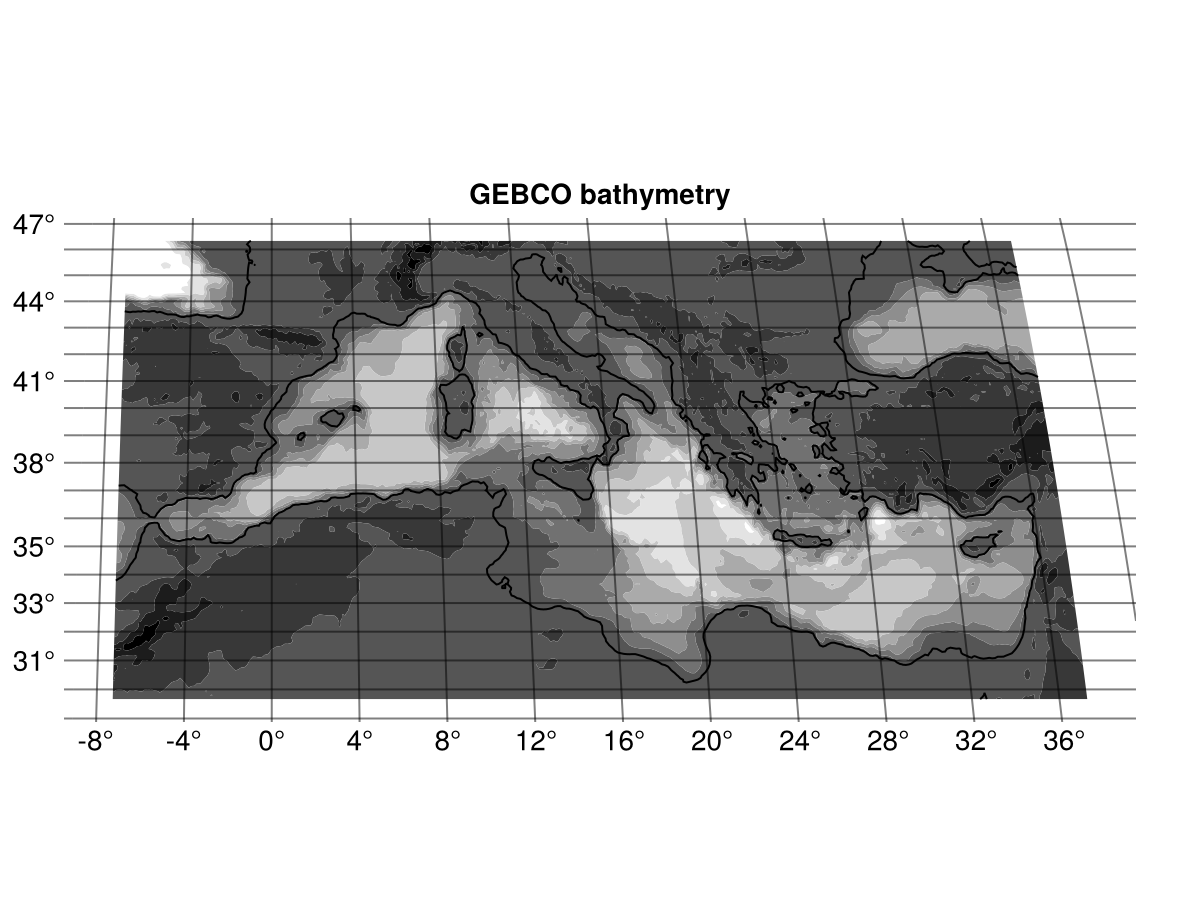

In [28]:
f = GeoMakie.Figure()
ax = GeoAxis(f[1,1], title="GEBCO bathymetry")
GeoMakie.contourf!(ax, bx, by, b, colormap=Reverse("binary"))
GeoMakie.contour!(ax, bx, by, b, levels=[0.], color="black")
f

Plotting gotchas:
* `colorbar()` refers to the last added item. If the last added item is the land-sea mask, the colorbar will be all gray.
* maps look nicer if you set the corresponding aspect ratio based on the average latitude `mean(latr)`.

## Data plotting
The bathymetry is used to display a land-sea mask using the `contourf` function with 2 levels.      
The data are shown as colored circles using `scatter`.

In [30]:
f = GeoMakie.Figure()
ax = GeoAxis(f[1,1], title="GEBCO bathymetry")
GeoMakie.contourf!(ax, bx, by, b, levels = [-1e5,0,1e5], colormap=Reverse("binary"))
GeoMakie.scatter!(ax, obslon[sel],obslat[sel]; color = obsval[sel])
f

LoadError: UndefVarError: `obslon` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
scatter(lonsel, latsel, 5, valsel); 
colorbar(orientation = "vertical", shrink=.6);
#clim(36,37.7)
contourf(bx, by, permutedims(b, [2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])

# compute and set the correct aspect ratio
aspect_ratio = 1/cos(mean(latr) * pi/180)
gca().set_aspect(aspect_ratio)

# Check for duplicates

There are two ways to call the function `checkduplicates`:

In [ ]:
?DIVAnd.Quadtrees.checkduplicates

We load a small ODV file containing data in the same domain to test the duplicate detection.     
We use the function `ODVspreadsheet.load` available within `DIVAnd.jl`.

In [ ]:
smallODVfile = "../data/small_ODV_sample.txt"
isfile(smallODVfile) ? @info("File already downloaded") : download("https://dox.uliege.be/index.php/s/5FdKh6Md0VAjsIU/download", smallODVfile)

In [ ]:
?ODVspreadsheet.load

In [ ]:
obsval_ODV,obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV,obsid_ODV = ODVspreadsheet.load(Float64,[smallODVfile],
                           ["Water body salinity"]; nametype = :localname );

In [ ]:
length(obsval_ODV)

In [ ]:
checkobs((obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV),obsval_ODV,obsid_ODV)

In [ ]:
scatter(obslon_ODV, obslat_ODV, 10, obsval_ODV); 

Look for duplicates
* within 0.01 degree (about 1km)
* within 0.01 m depth
* within 1 minute.      

Difference in value is 0.01 psu.

In [ ]:
dupl = DIVAnd.Quadtrees.checkduplicates((obslon_ODV,obslat_ODV,obsdepth_ODV,obstime_ODV),
    obsval_ODV,(obslon,obslat,obsdepth,obstime),
    obsval,(0.01,0.01,0.01,1/(24*60)),0.01);

In [ ]:
size(obsval) == size(dupl)

* `dupl` is an array of the same length as `obsval`
* If the i-th element of `dupl` is an empty list, then the i-th element in `obsval` is probably not a duplicate
* Otherwise, the i-th element in `obsval` is probably a duplicate of the element `val_ODV` with the indices `dupl[i]`.

In [ ]:
dupl[1]

To get a list of possible duplicates, we check for the elements of `dupl` that are not empty.

In [ ]:
index = findall(.!isempty.(dupl))

Number of duplicate candidates

In [ ]:
length(index)

Check the first reported duplicate

In [ ]:
if length(index) > 0
    index_WOD = index[1]
else
    @info("No duplicate detected")
end

Show its coordinates and value from the ODV file:

In [ ]:
obslon[index_WOD],obslat[index_WOD],obsdepth[index_WOD],obstime[index_WOD],obsval[index_WOD]

They are quite close to the data point with the index:

In [ ]:
dupl[index_WOD]

In [ ]:
index_ODV = dupl[index_WOD][1]

In [ ]:
obslon_ODV[index_ODV],obslat_ODV[index_ODV],
obsdepth_ODV[index_ODV],obstime_ODV[index_ODV],
obsval_ODV[index_ODV]

Indeed, it is quite likely that they are duplicates.

Combine the dataset and retain only new points from WOD

In [ ]:
newpoints = findall(isempty.(dupl));
@show length(newpoints)

In [ ]:
obslon_combined   = [obslon_ODV;   obslon[newpoints]];
obslat_combined   = [obslat_ODV;   obslat[newpoints]];
obsdepth_combined = [obsdepth_ODV; obsdepth[newpoints]];
obstime_combined  = [obstime_ODV;  obstime[newpoints]];
obsval_combined   = [obsval_ODV;   obsval[newpoints]];
obsids_combined   = [obsid_ODV;   obsid[newpoints]];

## CMEMS data download
The function works in a similar way.

In [ ]:
?CMEMS.download

## Exercice
1. Download data from CMEMS in the same domain and for the same time period.
2. Plot the data location on a map along with the WOD observations.
3. Check for the duplicates between the two datasets.